# Pytorch visualization
- https://github.com/pytorch/vision/blob/master/torchvision/utils.py
- https://github.com/utkuozbulak/pytorch-cnn-visualizations

In [128]:
import torch
import torchvision 
import torch.nn as nn
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt
import json
import torch
import torchvision.transforms as transforms
from torch.autograd import Variable
import torchvision.models as models
from PIL import Image

plt.ion() # interactive mode
%matplotlib inline

## Pretrained model instantiation

In [129]:
model = models.alexnet(pretrained=True)
model

AlexNet (
  (features): Sequential (
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU (inplace)
    (2): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU (inplace)
    (5): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU (inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU (inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU (inplace)
    (12): MaxPool2d (size=(3, 3), stride=(2, 2), dilation=(1, 1))
  )
  (classifier): Sequential (
    (0): Dropout (p = 0.5)
    (1): Linear (9216 -> 4096)
    (2): ReLU (inplace)
    (3): Dropout (p = 0.5)
    (4): Linear (4096 -> 4096)
    (5): ReLU (inplace)
    (6): Linear (4096 -> 1000)
  )
)

torch.Size([64, 3, 11, 11])


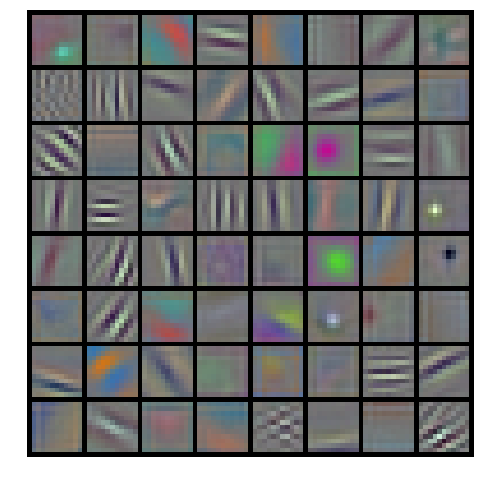

In [130]:
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt


def vistensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    '''
    vistensor: visuzlization tensor
        @ch: visualization channel 
        @allkernels: visualization all tensores
    ''' 
    
    n,c,w,h = tensor.shape

    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
        
    rows = np.min( (tensor.shape[0]//nrow + 1, 64 )  )    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

def savetensor(tensor, filename, ch=0, allkernels=False, nrow=8, padding=2):
    '''
    savetensor: save tensor
        @filename: file name
        @ch: visualization channel 
        @allkernels: visualization all tensores
    '''    

    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c,-1,w,h )
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)    
    utils.save_image(tensor, filename, nrow=nrow )


ik = 0
kernel = models.alexnet(pretrained=True).features[ik].weight.data.clone()
print(kernel.shape)

vistensor(kernel, ch=0, allkernels=False)
savetensor(kernel,'kernel.png', allkernels=False)

plt.axis('off')
plt.ioff()
plt.show()

In [131]:
# imagenet id to class name mapping
class_idx = json.load(open("imagenet_class_index.json"))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
#print(class_idx)

In [132]:
# transformation for alexnet
# reference : http://pytorch.org/docs/0.2.0/torchvision/models.html
centre_crop = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [133]:
# API to classify an image
def classify(img_path):
    model.eval()
    img = Image.open(img_path)
    centre_cropped_img = centre_crop(img)    
    var_img = Variable(centre_cropped_img.unsqueeze(0))
    out = model(var_img)
    
    # display the image
    print(centre_cropped_img.size())
    plt.imshow(np.asarray(img))
    plt.show()
    # print top 10 classes
    for idx in out.data[0].sort()[1][-10:]:
        print(idx2label[idx])    

torch.Size([3, 224, 224])


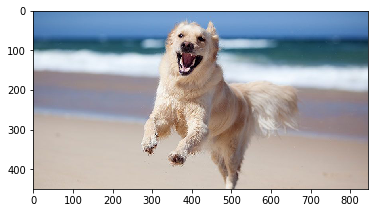

standard_poodle
Pembroke
Sussex_spaniel
Labrador_retriever
clumber
kuvasz
Afghan_hound
Tibetan_terrier
cocker_spaniel
golden_retriever
torch.Size([3, 224, 224])


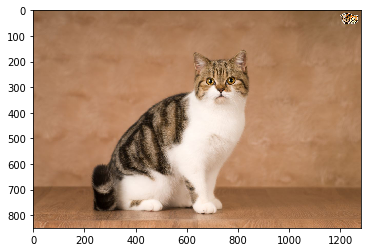

Shetland_sheepdog
wood_rabbit
Japanese_spaniel
lynx
Persian_cat
hare
papillon
tiger_cat
Egyptian_cat
tabby
torch.Size([3, 224, 224])


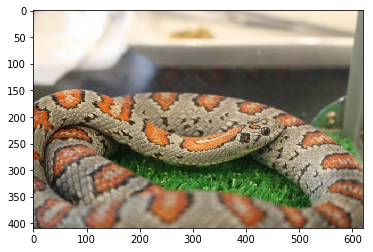

rock_python
garter_snake
night_snake
eft
hognose_snake
alligator_lizard
horned_viper
king_snake
sidewinder
ringneck_snake
torch.Size([3, 224, 224])


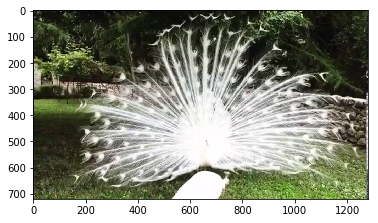

flatworm
coral_reef
fountain
cardoon
skunk
quill
sea_anemone
sea_urchin
porcupine
peacock
torch.Size([3, 224, 224])


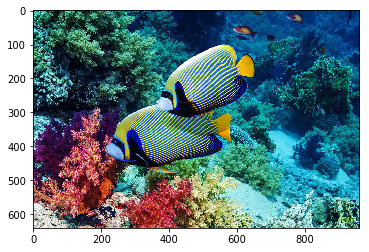

flatworm
puffer
sea_slug
sea_anemone
eel
scuba_diver
brain_coral
coral_reef
anemone_fish
rock_beauty
torch.Size([3, 224, 224])


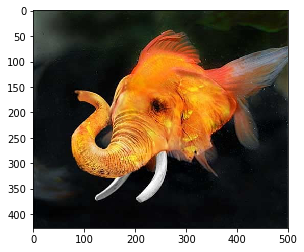

sea_slug
teddy
sea_anemone
jellyfish
isopod
rock_beauty
vulture
mask
puffer
goldfish


In [134]:
# images
classify('./pics/imagenet/dog.jpg')
classify('./pics/imagenet/cat.jpg')
classify('./pics/imagenet/snake.jpg')
classify('./pics/imagenet/peacock.jpg')
classify('./pics/imagenet/fish.jpg')
classify('./pics/imagenet/fish+elephant.jpg')